# 1. Know Your Data

# Import Libraries

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

%matplotlib inline

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading all: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>



# Load Dataset

In [2]:

# We read the labels into a csv file using the pandas library:
train_original = pd.read_csv('C:/Users/F5401895/OneDrive - FRG/Documents/COVID_19_Tweet_Classification_Challenge/train.csv')


In [3]:
# We read the labels into a csv file using the pandas library:
test_original = pd.read_csv('C:/Users/F5401895/OneDrive - FRG/Documents/COVID_19_Tweet_Classification_Challenge/test.csv')


# Dataset First View

In [4]:

# Dataset First Look
train_original.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


# Dataset Rows & Columns count

In [5]:

# Dataset Rows & Columns count
train_original.shape

(5287, 3)

In [6]:

train_original.columns

Index(['ID', 'text', 'target'], dtype='object')

In [7]:
train_original.index

RangeIndex(start=0, stop=5287, step=1)

# Dataset Information

In [8]:

# Dataset Info
train_original.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5287 non-null   object
 1   text    5287 non-null   object
 2   target  5287 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 124.0+ KB


# Duplicate Values

In [9]:
# Dataset Duplicate Value Count
train_original.duplicated().sum()

0

# Missing Values/Null Values

In [10]:

# Missing Values/Null Values Count
train_original.isna().sum()

ID        0
text      0
target    0
dtype: int64

In [11]:

# Visualizing the missing values
train_original.isnull().sum().sort_values(ascending=False)

ID        0
text      0
target    0
dtype: int64

What did you know about your dataset?

In this Dataset their are 3 column having 'ID', 'Text' and 'target', no duplicates 

# 2. Understanding Your Variables

In [12]:
# Dataset Columns
train_original.columns

Index(['ID', 'text', 'target'], dtype='object')

In [13]:

# Dataset Describe
train_original.describe(include='all')

,ID,text,target
count,5287,5287,5287.000000
unique,5287,5287,NaN
top,train_5975,Top Noticias Gurria We just updated our data o...,NaN
freq,1,1,NaN
mean,NaN,NaN,0.480613
std,NaN,NaN,0.499671
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,1.000000


# Check Unique Values for each variable.

In [14]:

# Check Unique Values for each variable.
print(train_original.apply(lambda col: col.unique()))

ID        [train_0, train_1, train_2, train_3, train_4, ...
text      [The bitcoin halving is cancelled due to, Merc...
target                                               [1, 0]
dtype: object


In [15]:

train_original.target.unique()

array([1, 0], dtype=int64)

# 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [16]:

# Chart - 1 visualization code
# Count the number of occurrences of each target value in the 'Sentiment' column of the 'tweet' DataFrame and reset the index
target_count = train_original['target'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'Sentiment' and 'count', respectively
target_count.columns = ['target','count']
target_count

,target,count
0,0,2746
1,1,2541


Text(0, 0.5, 'count')

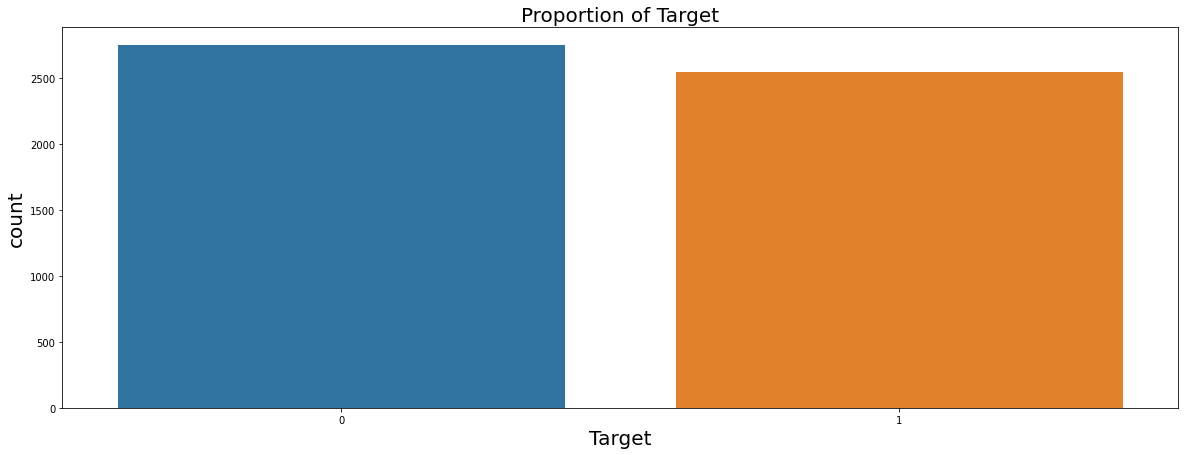

In [17]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="target", y='count', data=target_count)
ax.set_title("Proportion of Target", fontsize=20)
ax.set_xlabel("Target", fontsize=20)
ax.set_ylabel('count', fontsize=20)

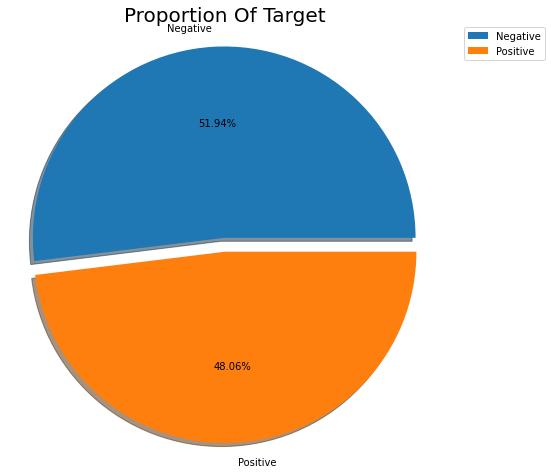

In [18]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
target_count1 = train_original['target'].value_counts().to_list()
labels=['Negative','Positive']
plt.figure(figsize=(10,8))
plt.pie(x=target_count1,explode=[0.04,0.04],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Target", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()





In [19]:

# Chart - 3 visualization code
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
train_original['text_length'] = train_original['text'].apply(len)

In [20]:
train_original_character_length=train_original['text_length'].sort_values(ascending=False)

In [21]:
# Create a DataFrame `top_tweet_character_length` from `train_original_character_length
top_train_original_character_length=pd.DataFrame(train_original_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_train_original_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_train_original_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

     

In [22]:
top_train_original_character_length

,Original_Tweet_Row,tweet_character_Count
0,871,302
1,472,301
2,4748,294
3,462,292
4,4590,287
...,...,...
5282,687,21
5283,3240,21
5284,1538,21
5285,2699,21


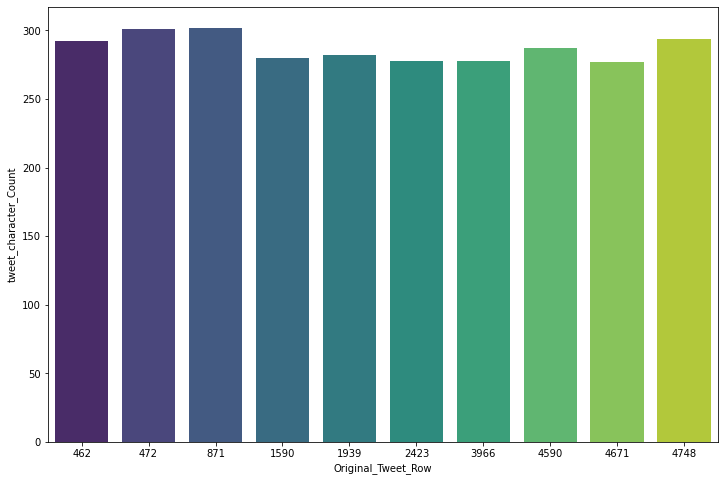

In [23]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_train_original_length=top_train_original_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_train_original_length, palette='viridis')
     

# 4. Feature Engineering & Data Pre-processing

# 4.1. Handling Missing Values

In [24]:

# Handling Missing Values & Missing Value Imputation
train_original.isnull().sum().sort_values(ascending=False)

ID             0
text           0
target         0
text_length    0
dtype: int64

# 4.2. Handling Outliers

In [25]:
# # Handling Outliers & Outlier treatments
print(train_original[['text', 'target']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5287 non-null   object
 1   target  5287 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 82.7+ KB
None


# 5. Textual Data Preprocessing

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [26]:

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:

import regex as re

In [29]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]
    
    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words into a string and return
    return ' '.join(lemmatized_words)


Which text normalization technique have you used and why?



Answer Here.

Here we use only Lemmatization normalization technique because Lemmatization is a technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used Lemmatization technique as proper text form and later used for classfication modelling .

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")
  

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [31]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
train_original["Clean_text"] = train_original['text'].apply(transform_text)



In [32]:
 # Access the 'OriginalTweet' value in the row with integer in `tweet
train_original.iloc[2516]["text"]

'just me my cat and these four walls everyday'

In [33]:
train_original.head()

,ID,text,target,text_length,Clean_text
0,train_0,The bitcoin halving is cancelled due to,1,39,bitcoin halving cancelled due
1,train_1,MercyOfAllah In good times wrapped in its gran...,0,117,mercyofallah good time wrapped granular detail...
2,train_2,266 Days No Digital India No Murder of e learn...,1,93,266 day digital india murder e learning 2g onl...
3,train_3,India is likely to run out of the remaining RN...,1,112,india likely run remaining rna kit essential t...
4,train_4,In these tough times the best way to grow is t...,0,121,tough time best way grow learn case teach help...


In [34]:
# Create a new column in `tweet` called 'temp_list'
train_original['temp_list'] = train_original['Clean_text'].apply(lambda x:str(x).split())

In [35]:
train_original['temp_list']

0                      [bitcoin, halving, cancelled, due]
1       [mercyofallah, good, time, wrapped, granular, ...
2       [266, day, digital, india, murder, e, learning...
3       [india, likely, run, remaining, rna, kit, esse...
4       [tough, time, best, way, grow, learn, case, te...
                              ...                        
5282    [spread, novel, among, asylum, seeker, add, pi...
5283    [hundred, jewish, patient, treated, arab, prac...
5284    [beat, honestly, people, follow, sport, fan, l...
5285    [help, u, reach, people, donating, sharing, ra...
5286    [interest, rate, swap, derivative, pricing, py...
Name: temp_list, Length: 5287, dtype: object

In [36]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in train_original['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [37]:
top_words

,Common_words,count
0,ramadan,741
1,sport,427
2,u,377
3,amp,328
4,people,304
5,time,277
6,one,258
7,twitter,253
8,new,252
9,com,250


In [38]:

# Create a new DataFrame called `neutral` containing only the 'Clean_Tweets' column from `tweet` where the 'Sentiment' column is 'Neutral','positive','negative'.
positive=pd.DataFrame(train_original[['Clean_text']] [train_original['target'] == 1])
negative=pd.DataFrame(train_original[['Clean_text']] [train_original['target'] == 0])

In [39]:
positive

,Clean_text
0,bitcoin halving cancelled due
2,266 day digital india murder e learning 2g onl...
3,india likely run remaining rna kit essential t...
8,frontline health worker critical fight infecti...
10,maybe one distinguishing feature good leader u...
...,...
5276,tv claimed 20 000 life uk staggering 10 per ce...
5278,could pick 1 player q amp webinar lockdown wou...
5281,exclusive national alert related condition may...
5282,spread novel among asylum seeker add pile alar...


In [40]:
negative

,Clean_text
1,mercyofallah good time wrapped granular detail...
4,tough time best way grow learn case teach help...
5,fifa proposed allowing team make five substitu...
6,lover sport especially know sometimes time cha...
7,ig kinda cute sometimes smh
...,...
5279,reference python nothing loaded us 2 8mb ram p...
5280,great opportunity target funding directly spor...
5284,beat honestly people follow sport fan l share ...
5285,help u reach people donating sharing ramadan f...


In [41]:
top_words

,Common_words,count
0,ramadan,741
1,sport,427
2,u,377
3,amp,328
4,people,304
5,time,277
6,one,258
7,twitter,253
8,new,252
9,com,250


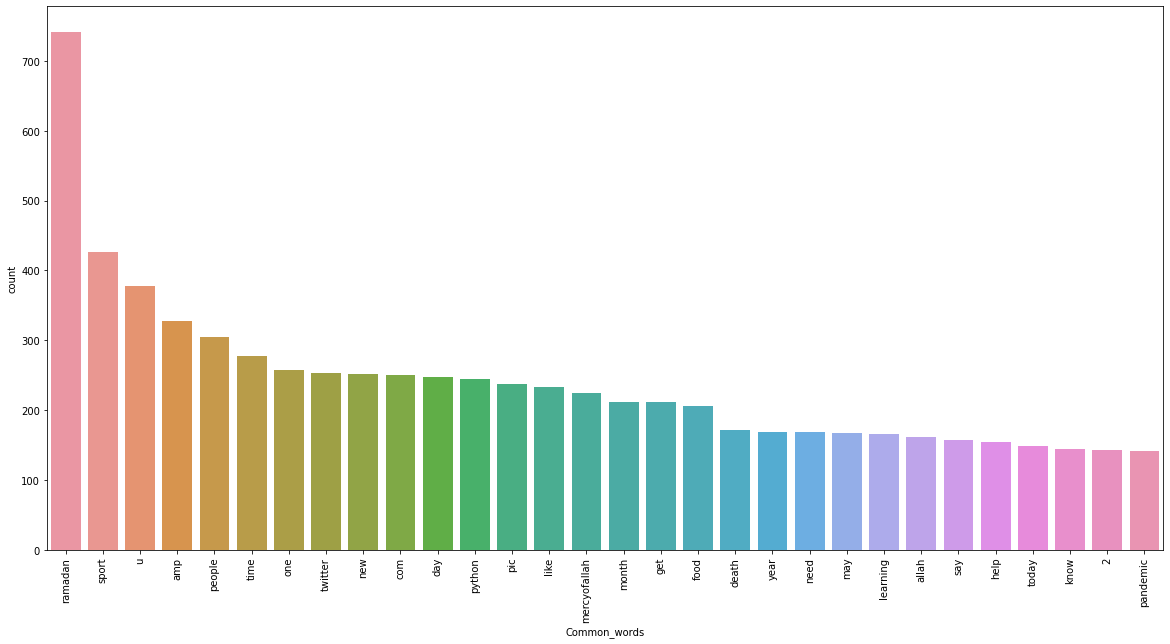

In [42]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [43]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:

# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `negative`
tweet_wc = wc.generate(str(negative['Clean_text']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [50]:

# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `positive`
tweet_wc = wc.generate(str(positive['Clean_text']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

# 6.Feature Manipulation & Selection

# Data Splitting

In [51]:

#Assigning dependent and independent features
X= train_original['Clean_text']
y=train_original['target']

In [52]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [53]:

#checking shape of splitted data
print(X_train.shape)
y_test.shape

(4229,)


(1058,)

Which method have you used to scale you data and why?

Answer Here.

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only User sentiment tweet according to the secenario of Covid-19.

# Handling Imbalanced Dataset

In [54]:

train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5287 non-null   object
 1   text         5287 non-null   object
 2   target       5287 non-null   int64 
 3   text_length  5287 non-null   int64 
 4   Clean_text   5287 non-null   object
 5   temp_list    5287 non-null   object
dtypes: int64(2), object(4)
memory usage: 248.0+ KB


Answer Here.

No , here we decided that We used only two column for machine learning modelling i.e 'text' & 'target' and in both column eqaul no of rows

# 8. ML Model Implementation

# Count Vectorization (Bag of words)

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

In [55]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
     

In [56]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [57]:

# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

(4229, 2106)

In [58]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [59]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape

(1058, 2106)

# MODEL -1 WITH BAGS OF WORDS

ML Model - 1

# Logistic regression

Logistic Regression is a statistical model that probability of an event taking place by having the the odds against winning range between 0 and 1 or muticlass classfication for the event be a linear combination of one or more independent variables

In [60]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [61]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [62]:
pred_lr_cv 

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [63]:
# get the logarithmic loss for the x_test
from sklearn.metrics import log_loss
print(log_loss(pred_lr_cv, logreg_Gcv.predict_proba(bw_X_test))) # log loss

0.1366447182861529


In [64]:

#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.8931947069943289


In [65]:
# Classification report of Performance metrics
label=['positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       550
           1       0.85      0.94      0.89       508

    accuracy                           0.89      1058
   macro avg       0.90      0.90      0.89      1058
weighted avg       0.90      0.89      0.89      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

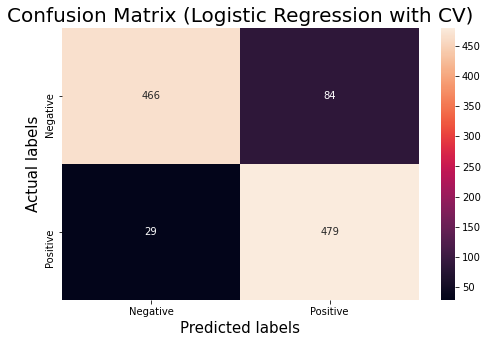

In [66]:

#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.

# Decision Tree Classifier with CV

A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression

In [67]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)

In [68]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.8420442877726021


In [69]:

# Classification report of Performance metrics
label=['Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       550
           1       0.86      0.88      0.87       508

    accuracy                           0.88      1058
   macro avg       0.88      0.88      0.88      1058
weighted avg       0.88      0.88      0.88      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

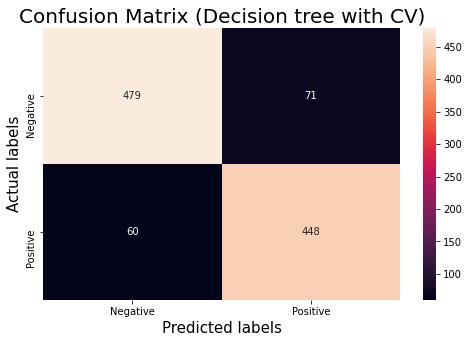

In [70]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ML Model - 3

# Navie Bayes

Naive Bayes is a probabilistic machine learning algorithm used for classification problems. It is based on Bayes' theorem, which describes the probability of a hypothesis (i.e., a class label) given some evidence (i.e., the input features).

In Naive Bayes, the assumption is made that the features are conditionally independent given the class label, which means that the presence or absence of one feature does not affect the probability of another feature.

In [71]:

#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
# Apply both  type of navies one by one 
mnb = MultinomialNB()
bnb = BernoulliNB()

# Multinomial Navie Bayes

Multinomial Naive Bayes: Used for discrete data where the features represent counts or frequencies of occurrences (e.g., text data)

In [73]:

# Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation of the training data 'bw_X_train' and the corresponding labels 'y_train'
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)


0.888468809073724


In [74]:

label=['Positive','Negative']
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       550
           1       0.88      0.89      0.88       508

    accuracy                           0.89      1058
   macro avg       0.89      0.89      0.89      1058
weighted avg       0.89      0.89      0.89      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

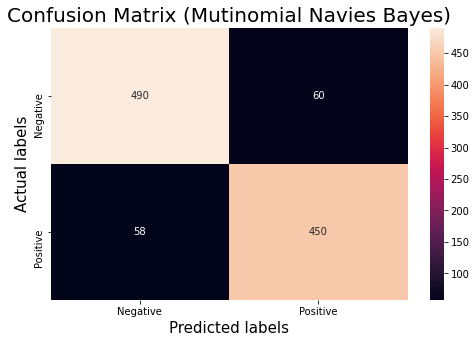

In [75]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
     

# Bernoulli Navies Bayes

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [76]:

#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.889413988657845


In [77]:
label=['Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       550
           1       0.87      0.91      0.89       508

    accuracy                           0.89      1058
   macro avg       0.89      0.89      0.89      1058
weighted avg       0.89      0.89      0.89      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

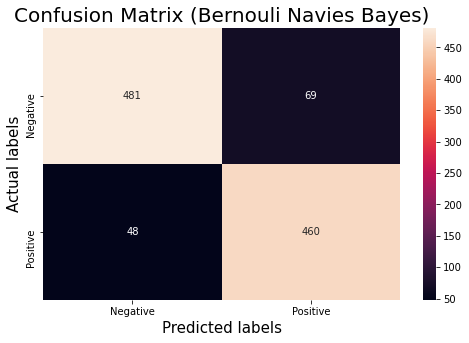

In [78]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ML Model - 4

# KNN(K-Nearest Neighbours)

It is a simple algorithm that works by finding the K closest instances in the training data to a given input instance and then assigning the label of the majority class among those instances as the predicted label for the input instance.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)


Best hyperparameters: {'n_neighbors': 1}
Mean cross-validation score: 0.7760792871431169


In [80]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [81]:
pred_knn_cv
     

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.8251417769376181


In [83]:

# Classification report of Performance metrics
label=['Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       550
           1       0.78      0.90      0.83       508

    accuracy                           0.83      1058
   macro avg       0.83      0.83      0.82      1058
weighted avg       0.83      0.83      0.82      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

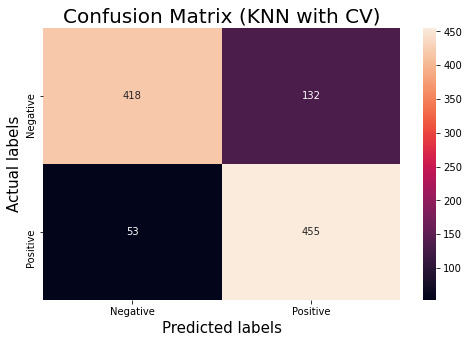

In [84]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ML Model - 5

# Support Vector Machine

It is a supervised learning algorithm that works by finding the hyperplane that best separates the classes in the input data.

In multi-class classification problems, multiple hyperplanes are used to separate the classes. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest points from each class, known as support vectors.

In [85]:
# Initializing model
svm_cv = SVC(gamma='auto', probability=True)

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [86]:
pred_svm_cv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.5283553875236295


In [88]:

# Classification report of Performance metrics
label=['Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       550
           1       1.00      0.02      0.03       508

    accuracy                           0.53      1058
   macro avg       0.76      0.51      0.36      1058
weighted avg       0.75      0.53      0.37      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

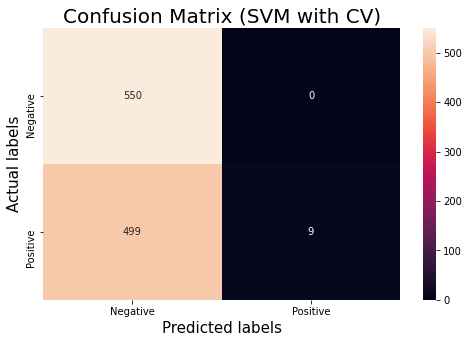

In [89]:

cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ML Model - 6

# Random Forest

Random Forest works by constructing multiple decision trees on randomly sampled subsets of the training data. Each tree is trained on a different subset of the features and the data, which helps to reduce overfitting and improve the generalization performance.

During prediction, the input instance is passed through each decision tree, and the majority vote among the predictions of the individual trees is taken as the final prediction.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)

Accuracy_rf: 0.8913043478260869


In [91]:
# Classification report of Performance metrics
label=['Positive','Negative']
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       550
           1       0.86      0.92      0.89       508

    accuracy                           0.89      1058
   macro avg       0.89      0.89      0.89      1058
weighted avg       0.89      0.89      0.89      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

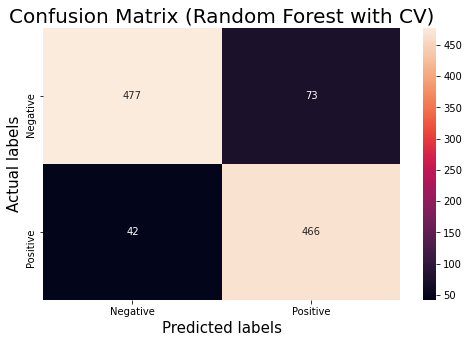

In [92]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ML Model - 7

# Stochastic Gradient Descent

In SGD, instead of computing the gradient over the entire training set, the gradient is computed on a randomly selected subset (or mini-batch) of the training data. This reduces the computational cost of the algorithm and enables faster convergence.

The model parameters are updated after each mini-batch, and the process is repeated until convergence or a maximum number of iterations is reached.

SGD can work well for large datasets and high-dimensional data, as it can efficiently handle large amounts of data and converge faster than traditional Gradient Descent

In [93]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)

Accuracy_sgd: 0.8620037807183365


In [94]:
# Classification report of Performance metrics
label=['Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       550
           1       0.84      0.88      0.86       508

    accuracy                           0.86      1058
   macro avg       0.86      0.86      0.86      1058
weighted avg       0.86      0.86      0.86      1058



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

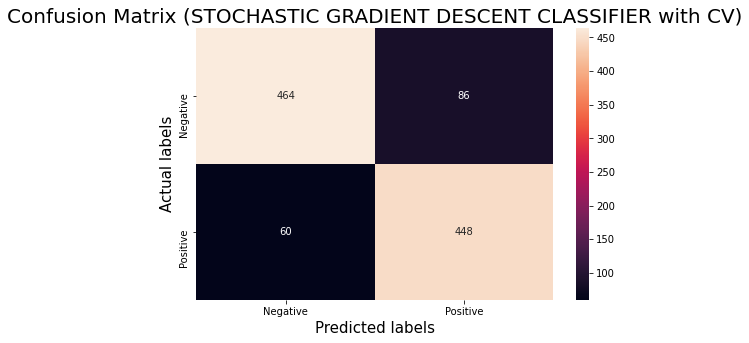

In [95]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Which ML model did you choose from the above created models as your final prediction model and why?

Based on the metrics chart above, we can conclude that the SVM (Support Vector Machine) model using Count VectorizationTechnique performed better with an accuracy level of 89%, compared other models

# clean the test data

In [96]:
test_original["Clean_text"] = test_original['text'].apply(transform_text)

In [97]:
test_original.head()

,ID,text,Clean_text
0,test_2,Why is explained in the video take a look,explained video take look
1,test_3,Ed Davey fasting for Ramadan No contest,ed davey fasting ramadan contest
2,test_4,Is Doja Cat good or do you just miss Nicki Minaj,doja cat good miss nicki minaj
3,test_8,How Boris Johnson s cheery wounded in action p...,boris johnson cheery wounded action persona ma...
4,test_9,Man it s terrible Not even a reason to get on ...,man terrible even reason get sport start back


In [98]:
test_original = test_original.drop('text', axis=1)

In [99]:
test_original.shape

(1962, 2)

In [101]:
valid_test= test_original['Clean_text']

In [105]:
# Bag of words
# tokenize the corpus
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2106)
bw_X_test = cv.fit_transform(valid_test).toarray()



In [106]:
bw_X_test.shape

(1962, 2106)

In [107]:
# predict probabilites

pred_sgd_prob= svm_cv.predict_proba(bw_X_test)

In [108]:
# SVM 
svm_df = pd.DataFrame({'Square_ID': test_original.ID, 'target': pred_sgd_prob[:, 1]}) # Creating a submission file
svm_df.to_csv('SVM.csv', index = False)